# Chapter One

## Computer Vision Classification

epoch,train_loss,valid_loss,error_rate,time
0,0.166049,0.020807,0.007442,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.053467,0.017605,0.005413,01:37


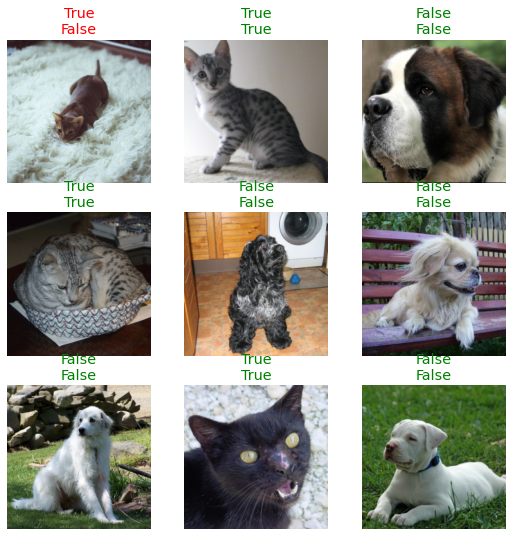

In [11]:
# Transfer Learning (Dogs vs Cats)

import fastbook

from fastbook import *
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

files = get_image_files(path)
len(files)

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# dls.show_batch()

learn = cnn_learner(dls, resnet34, metrics = error_rate)

# learn.lr_find()
learn.fine_tune(1)

learn.predict(files[0])

learn.show_results()

# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

# img = PILImage.create(uploader.data[0])
# img.to_thumb(192)

# is_cat,_,probs = learn.predict(img)
# print(f"Is this a cat?: {is_cat}.")
# print(f"Probability it's a cat: {probs[1].item():.6f}")


In [ ]:
# Transfer Learning Breeds (Dogs vs Cats)

from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

files = get_image_files(path)

breed = r'^(.*)_\d+.jpg'

dls = ImageDataLoaders.from_name_re(
    path, files, breed, item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

# dls.show_batch()

learn = cnn_learner(dls, resnet34, metrics=error_rate)

learn.fine_tune(4, 3e-3)

interp = Interpretation.from_learner(learn)

interp.plot_top_losses(9, figsize=(15,10))

# learn.lr_find()

# learn.show_results()

epoch,train_loss,valid_loss,error_rate,time
0,1.296942,0.318383,0.104871,01:16


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
# Segmentation (Camvid)

from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype = str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

learn.show_results(max_n = 6, figsize = (7,8))

epoch,train_loss,valid_loss,time
0,2.997095,2.482013,00:03


epoch,train_loss,valid_loss,time
0,2.114948,1.681206,00:03
1,1.788799,1.456434,00:03
2,1.563089,1.143112,00:03
3,1.400449,0.969880,00:03
4,1.246980,0.891290,00:03
5,1.117283,0.835527,00:03
6,1.010699,0.812399,00:03
7,0.927951,0.803852,00:03


## Natural Language Processing

In [17]:
# Text (IMDB)
# FileNotFoundError

from fastai.text.all import *

path = untar_data(URLs.IMDB)

path.ls()

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

dls.show_bath()

# learn = text_classifier_learner(
#     dls, AWD_LSTM, drop_mult = 0.5, metrics = accuracy
# )

# learn.fine_tune(2, 1e-2)

# learn.predict("I really liked that movie!")

FileNotFoundError: [Errno 2] No such file or directory: '/storage/data/imdb_tok/counter.pkl'

## Tabular

In [13]:
# Tabular (Adult Sample)

from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(
    path/'adult.csv', path = path, y_names = "salary",
    cat_names = ['workclass', 'education', 'marital-status', 
                 'occupation', 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize]
)

learn = tabular_learner(dls, metrics = accuracy)
learn.fit_one_cycle(2)

learn.show_results()

epoch,train_loss,valid_loss,accuracy,time
0,0.366101,0.357824,0.832463,00:06
1,0.345830,0.350783,0.835995,00:06


,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,3.0,5.0,2.0,4.0,5.0,1.0,-1.360098,0.066413,-0.810983,0.0,0.0
1,5.0,15.0,3.0,15.0,1.0,3.0,1.0,1.503686,1.554026,1.931645,1.0,1.0
2,5.0,12.0,5.0,2.0,4.0,3.0,1.0,-0.405503,-0.532947,-0.419179,0.0,0.0
3,5.0,10.0,5.0,5.0,2.0,5.0,1.0,-0.919516,-1.162937,1.148037,0.0,0.0
4,1.0,12.0,3.0,1.0,3.0,5.0,1.0,-1.286668,0.173333,-0.419179,0.0,0.0
5,5.0,9.0,3.0,13.0,1.0,5.0,1.0,-0.038352,0.176831,0.364429,0.0,1.0
6,3.0,13.0,1.0,11.0,5.0,5.0,1.0,0.695952,-0.015919,1.539841,0.0,0.0
7,5.0,16.0,3.0,2.0,6.0,5.0,1.0,-0.699225,-0.813248,-0.027375,1.0,0.0
8,5.0,10.0,3.0,8.0,1.0,5.0,1.0,-0.846086,-1.493616,1.148037,1.0,0.0


## Recommendation Systems

In [14]:
# Rating

from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)

dls = CollabDataLoaders.from_csv(path/'ratings.csv')

learn = collab_learner(dls, y_ranger = (0.5, 5.5))

learn.fine_tune(6)

learn.show_results()

epoch,train_loss,valid_loss,time
0,15.157366,14.247815,00:00


epoch,train_loss,valid_loss,time
0,14.072592,13.567230,00:00
1,12.488140,10.546956,00:00
2,8.966973,6.448137,00:00
3,5.707063,4.040395,00:00
4,3.920878,3.199485,00:00
5,3.233822,3.077453,00:00


,userId,movieId,rating,rating_pred
0,98.0,50.0,3.5,2.696169
1,16.0,31.0,4.0,2.544363
2,78.0,29.0,5.0,2.159705
3,59.0,9.0,4.0,2.396318
4,92.0,82.0,3.5,2.429161
5,63.0,25.0,2.5,2.210411
6,8.0,19.0,2.0,2.340163
7,37.0,75.0,5.0,2.311516
8,36.0,62.0,5.0,2.582614


In [1]:
!apt-get update
!apt-get install wget
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

Ign:1 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:2 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:3 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release.gpg [833 B]
Get:4 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Packages [105 kB]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release [697 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu xenial-security InRelease [109 kB]     
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Packages
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Packages [426 kB]
H